Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [135]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [136]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [137]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

<function <lambda> at 0x000001880B1AA828>
točnost modela:  1.0


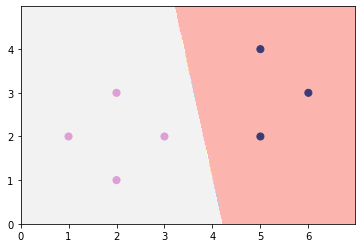

In [138]:
# Vaš kôd ovdje
𝛼=0

model=RidgeClassifier(𝛼).fit(seven_X, seven_y)
#h=model.predict(seven_X) - krivo trebamo funkciju

h = lambda x :model.predict(x)
print(h)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h)
accuracy = accuracy_score(seven_y,model.predict(seven_X))
print('točnost modela: ' , accuracy)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

<function <lambda> at 0x000001880B211708>


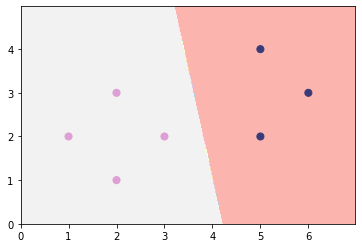

In [139]:
# Vaš kôd ovdje
model = LinearRegression().fit(seven_X, seven_y)

h=lambda x : model.predict(x) >= 0.5

print(h)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h)


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [140]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

<function <lambda> at 0x000001880823AE58>
točnost modela:  0.875


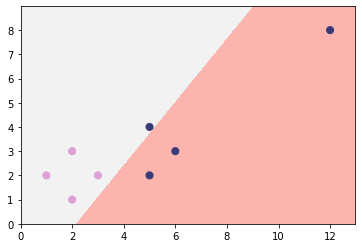

In [141]:
# Vaš kôd ovdje

𝛼=0

model=RidgeClassifier(𝛼).fit(outlier_X, outlier_y)
#h=model.predict(seven_X) - krivo trebamo funkciju

h = lambda x :model.predict(x)
print(h)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h)
accuracy = accuracy_score(outlier_y,model.predict(outlier_X))
print('točnost modela: ' , accuracy)


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [142]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

<function <lambda> at 0x000001880B2118B8>
točnost modela:  0.875


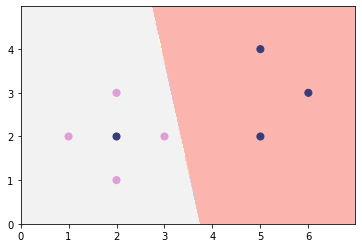

In [143]:
# Vaš kôd ovdje
𝛼=0

model=RidgeClassifier(𝛼).fit(unsep_X, unsep_y)
#h=model.predict(seven_X) - krivo trebamo funkciju

h = lambda x :model.predict(x)
print(h)
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h)
accuracy = accuracy_score(unsep_y,model.predict(unsep_X))
print('točnost modela: ' , accuracy)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [144]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures

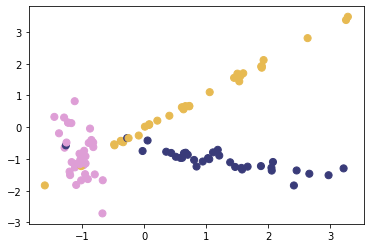

In [145]:
# Vaš kôd ovdje

X, y = make_classification(n_features=2, n_redundant=0, n_classes=3,  n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'pomoću klase RidgeClass')

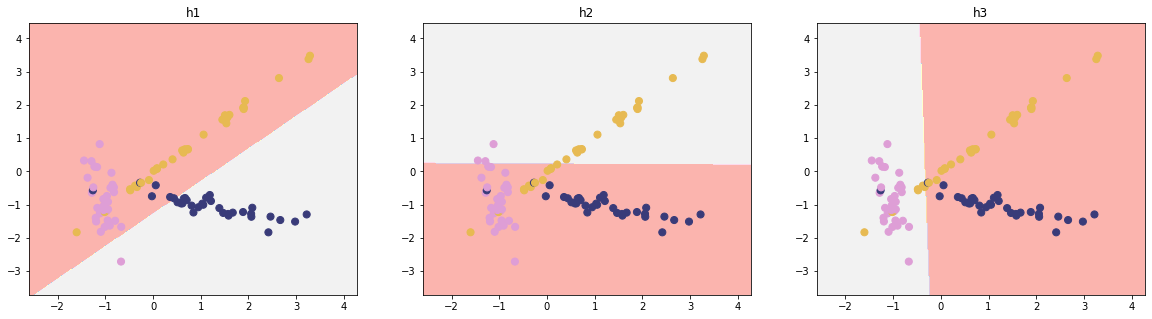

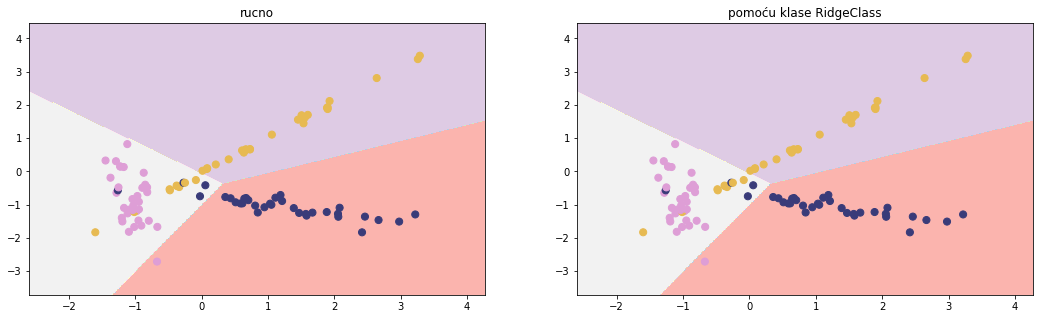

In [146]:
def separate(y, current_class):
    separated = []
    for i in y:
        if i==current_class:
            separated.append(1)
        else:
            separated.append(0)
    return separated

models = []
plt.figure(figsize= (20, 5))

for i in [0, 1, 2]:
    m = LinearRegression()
    models.append(m)
    separated = separate(y, i)
    m.fit(X, separated)
    predictions = m.predict(X)
    classes = []

    for prediction in predictions:
        if prediction > 0.5:
            classes.append(1)
        else:
            classes.append(0)
    subplot(1, 3, i+1)
    mlutils.plot_2d_clf_problem(X, y, h = lambda x: m.predict(x) >= 0.5)
    plt.title("h" + str(i+1))
    #plt.show()
    
    
h = lambda x: np.argmax([models[0].predict(x.reshape(1,-1)), models[1].predict(x.reshape(1,-1)), models[2].predict(x.reshape(1,-1))])  

plt.figure(figsize= (18, 5))
plt.subplot(1,2,1)
mlutils.plot_2d_clf_problem(X, y, h)
plt.title("rucno")


𝛼=0
model=RidgeClassifier(𝛼).fit(X, y)
h_ridge = lambda x :model.predict(x)
plt.subplot(1,2,2)
mlutils.plot_2d_clf_problem(X, y, h_ridge)
plt.title("pomoću klase RidgeClass")
    

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

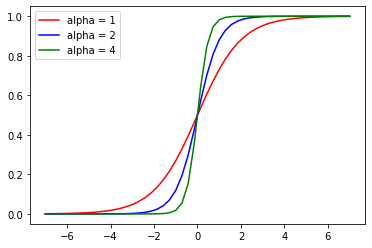

In [147]:
# Vaš kôd ovdje

def sigm(x, a=1):
    return 1/(1 + exp(-a*x))

x = linspace(-7,7)

plt.plot(x, sigm(x,1), 'r')
plt.plot(x, sigm(x,2), 'b')
plt.plot(x, sigm(x,4), 'g')
plt.legend(["alpha = 1", "alpha = 2", "alpha = 4"])


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [148]:

def lr_h(x, w):
    return sigm(PolynomialFeatures(1).fit_transform(x.reshape(1,-1)).dot(w))

def cross_entropy_error(X, y, w):
    return sklearn.metrics.log_loss(y, sigm(PolynomialFeatures(1).fit_transform(X).dot(w)))

def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    
    w = zeros(len(X[1]) + 1)
    prev_error = 0
    w_Trace = [];
    
    for i in range(0, max_iter):
        delta_w0 = 0
        delta_w = zeros(len(X[1]))
        error = 0
        
        for j in range(0, len(X)):
            #konv w
            h = lr_h(X[j], w)
            delta_w0 += h - y[j]
            delta_w += (h - y[j])*X[j]
             #add loss to error
            error += -y[j] * np.log(h) - (1 - y[j]) * np.log(1 - h)
            
        if abs(prev_error - error) < epsilon: 
            print("max iter dosegnuta na i= ", i)
            break
        else: prev_error = error
            
        w[0] -= eta * delta_w0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * delta_w
        w_Trace.extend(w)
        
    if trace:
        return (w, w_Trace)  
    else:
        return w
        
        
        

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

cross entropy error:  0.07751718252492557
w:  [ 6.44150959 -2.11012128  0.53522851]


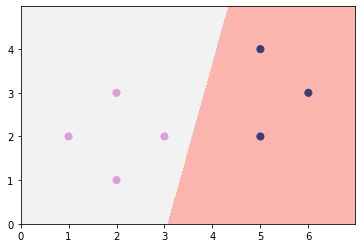

In [149]:
# Vaš kôd ovdje

w_3 = lr_train(seven_X, seven_y)

model_3 = lambda x: lr_h(x, w_3) >= 0.5

figure()
mlutils.plot_2d_clf_problem(seven_X, seven_y, model_3)
print ('cross entropy error: ', cross_entropy_error(seven_X, seven_y, w_3))
print ('w: ', w_3)



**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

[ 6.44150959 -2.11012128  0.53522851]


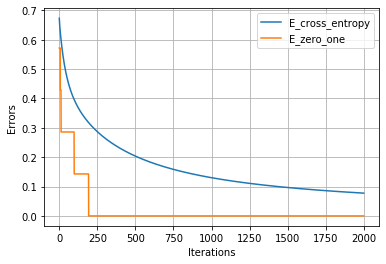

max iter dosegnuta na i=  1544
max iter dosegnuta na i=  1128


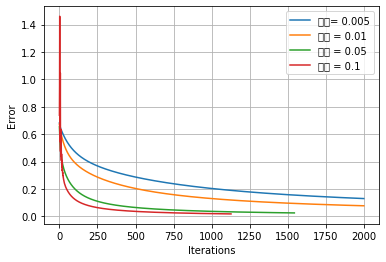

In [150]:
# Vaš kôd ovdje

#prvi graf
[w_3, w_trace] = lr_train(seven_X, seven_y, trace=True)
print (w_3)

fi = PolynomialFeatures(1).fit_transform(seven_X)
h3 = lambda x: x >= 0.5

E_cross_entropy = []
E_zero_one = []

for i in range(0, len(w_trace), 3):
    E_cross_entropy.append(cross_entropy_error(seven_X, seven_y, w_trace[i:i+3]))
    E_zero_one.append(sklearn.metrics.zero_one_loss(seven_y, h3(sigm(fi.dot(w_trace[i:i+3])))))

figure()
plt.plot(E_cross_entropy)
plt.plot(E_zero_one)

plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(['E_cross_entropy', 'E_zero_one'])
plt.grid()
plt.show()

#drugi graf

𝜂s = [0.005, 0.01, 0.05, 0.1]
E_cross_etas = []

for 𝜂 in 𝜂s:
    errors = []
    [w, traceEta] = lr_train(seven_X, seven_y, 𝜂, trace=True)    
    for i in range(0, len(traceEta), 3):
        errors.append(cross_entropy_error(seven_X, seven_y, traceEta[i:i+3]))
    E_cross_etas.append(errors)
    
figure()
for i in range(0, len(𝜂s)):
    plt.plot(E_cross_etas[i])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['𝜂= 0.005', '𝜂 = 0.01', '𝜂 = 0.05', '𝜂 = 0.1'])
plt.grid()
plt.show()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [151]:
from sklearn.linear_model import LogisticRegression

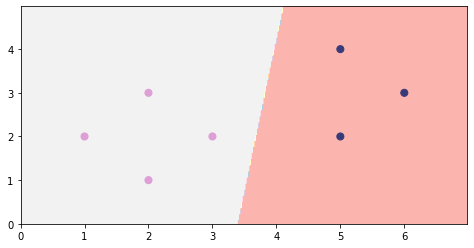

In [152]:
# Vaš kôd ovdje

model = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1)
model.fit(seven_X,seven_y)
h = lambda x : model.predict(x)

figure(figsize(8, 4))
mlutils.plot_2d_clf_problem(seven_X,seven_y, h)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

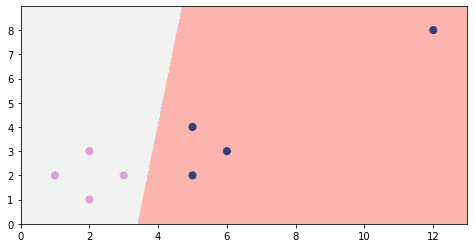

In [153]:
model = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1)
model.fit(outlier_X,outlier_y)
h = lambda x : model.predict(x)

figure(figsize(8, 4))
mlutils.plot_2d_clf_problem(outlier_X,outlier_y, h)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


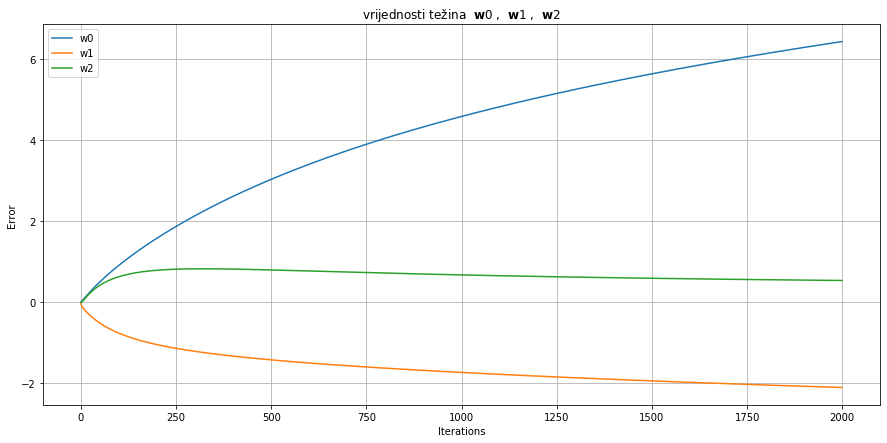

Text(0.5, 1.0, ' izlaz modela $h(\\mathbf{x})$ za svih sedam primjera')

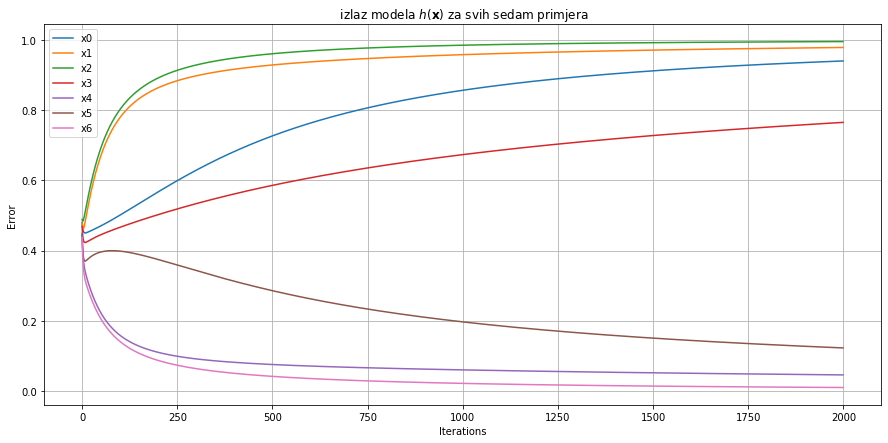

In [154]:
# Vaš kôd ovdje

w, w_trace = lr_train(seven_X, seven_y, trace=True)

w0 = []
w1 = []
w2 = []

for i in range(0, len(w_trace),3):
    w0.append(w_trace[i]) 
    w1.append(w_trace[i+1])
    w2.append(w_trace[i+2])
    
    
figure(figsize(15, 7))
plot(w0)
plot(w1)
plot(w2)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
title('vrijednosti težina  $\mathbf{w}0$ ,  $\mathbf{w}$1 ,  $\mathbf{w}2$')
plt.legend(['w0', 'w1', 'w2'])
plt.show()
        
    
figure(figsize(15, 7))
for i in range(0, len(seven_X)):
    predictions = []
    for j in range(0,len(w_trace),3):
        predictions.append(lr_h(seven_X[i], w_trace[j:j+3]))
    plot(predictions)
    
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
legend(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
title(' izlaz modela $h(\mathbf{x})$ za svih sedam primjera')




#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

max iter dosegnuta na i=  1315


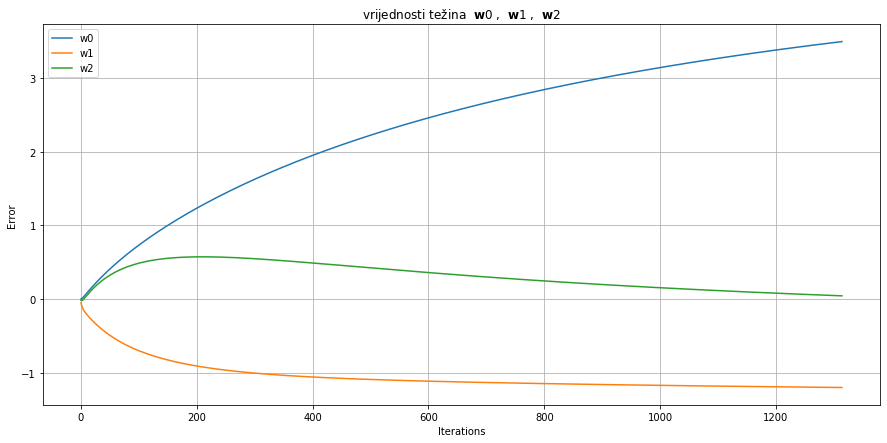

Text(0.5, 1.0, ' izlaz modela $h(\\mathbf{x})$ za svih sedam primjera')

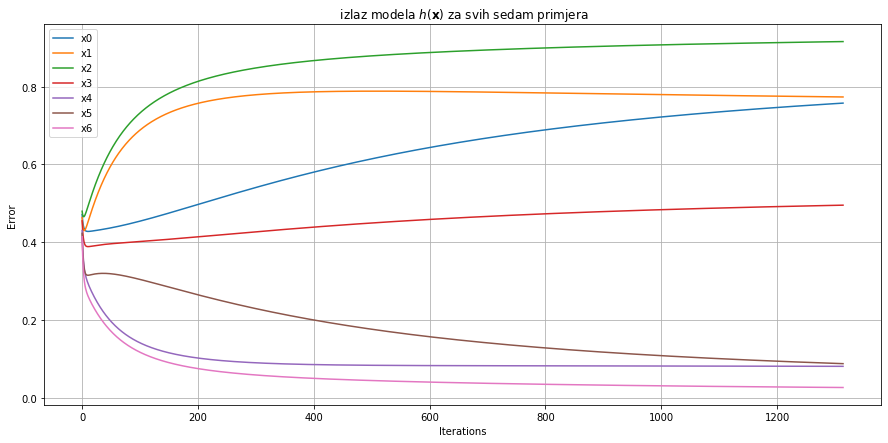

In [155]:
# Vaš kôd ovdje

w, w_trace = lr_train(unsep_X, unsep_y, trace=True)

w0 = []
w1 = []
w2 = []

for i in range(0, len(w_trace),3):
    w0.append(w_trace[i]) 
    w1.append(w_trace[i+1])
    w2.append(w_trace[i+2])
    
    
figure(figsize(15, 7))
plot(w0)
plot(w1)
plot(w2)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
title('vrijednosti težina  $\mathbf{w}0$ ,  $\mathbf{w}$1 ,  $\mathbf{w}2$')
plt.legend(['w0', 'w1', 'w2'])
plt.show()
        
    
figure(figsize(15, 7))
for i in range(0, len(seven_X)):
    predictions = []
    for j in range(0,len(w_trace),3):
        predictions.append(lr_h(seven_X[i], w_trace[j:j+3]))
    plot(predictions)
    
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
legend(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
title(' izlaz modela $h(\mathbf{x})$ za svih sedam primjera')




### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [156]:
from numpy.linalg import norm

max iter dosegnuta na i=  772
max iter dosegnuta na i=  230


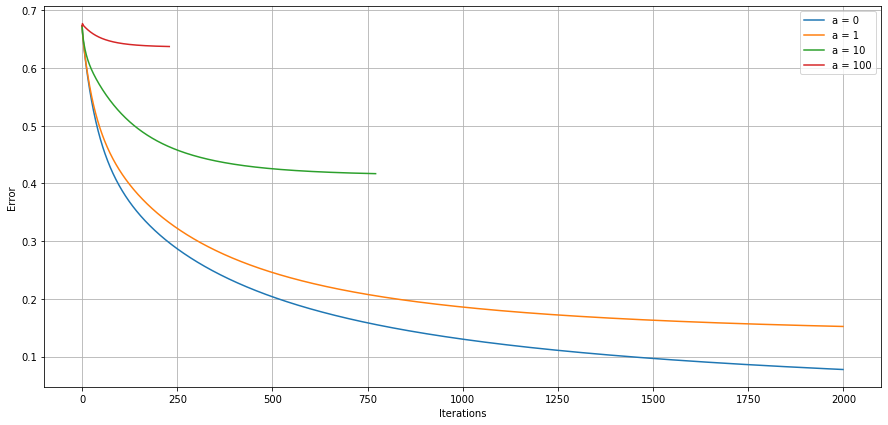

max iter dosegnuta na i=  772
max iter dosegnuta na i=  230


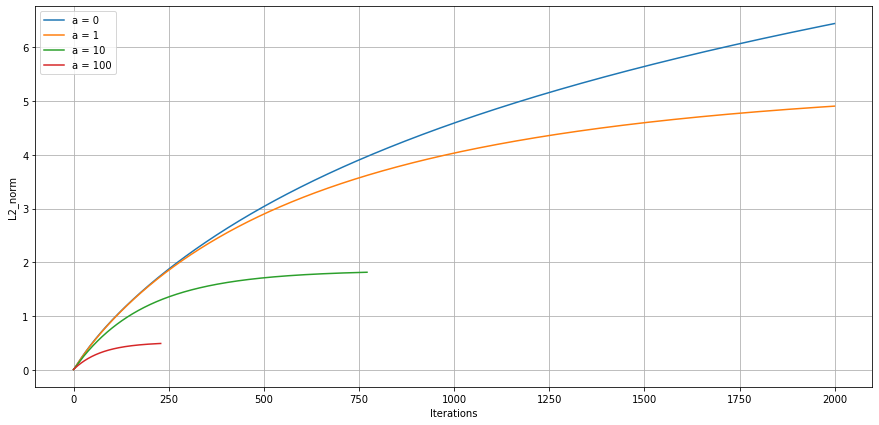

In [157]:
# Vaš kôd ovdje...
𝛼s = [0, 1, 10, 100]


#unakrsna entropija
figure(figsize(15, 7))
for 𝛼 in 𝛼s:
    
    w, w_trace = lr_train(seven_X, seven_y, alpha=𝛼, trace=True)
    errors = []
    
    for i in range(0, len(w_trace), 3):
        error = cross_entropy_error(seven_X, seven_y, w_trace[i:i+3])
        errors.append(error)  
    plt.plot(errors)  

plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['a = 0', 'a = 1', 'a = 10', 'a = 100'])
plt.show()

#L2 norma
figure(figsize(15, 7))
for 𝛼 in 𝛼s:
    
    w, w_trace = lr_train(seven_X, seven_y, alpha=𝛼, trace=True)
    L2_norm = []
    
    for i in range(0, len(w_trace), 3):    
        L2_norm.append(linalg.norm(w_trace[i:i+1], 2))
    plt.plot(L2_norm)  
    
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('L2_norm')
plt.legend(['a = 0', 'a = 1', 'a = 10', 'a = 100'])
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [158]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

d =  2
d =  3


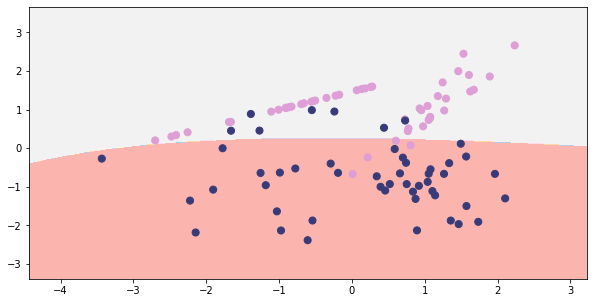

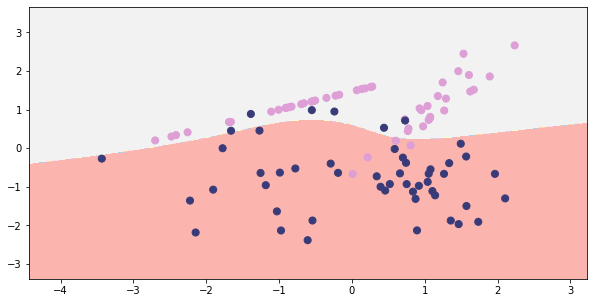

In [159]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
X_6, y_6 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

x
for d in [2,3]:
    poly_features=PolynomialFeatures(d)
    𝚽_6 = poly_features.fit_transform(X_6)
    #regularizacijski faktor je 1 - po želji
    model_6 = LogisticRegression(C = 1).fit(𝚽_6, y_6)
    h6 = lambda x: model_6.predict(poly_features.transform(x))
    figure(figsize(10,5))
    mlutils.plot_2d_clf_problem(X_6, y_6, h6)
    print('d = ', d)
    plt.show
    

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?